# AIHUB 지능형 스마트팜(오이, 딸기) 데이터

In [1]:
import glob
import json
import cv2
import matplotlib.pyplot as plt

## 딸기 병충해 피해 이미지

In [3]:
training_file_pattern = 'Data/Json/Training/TL_딸기_병해충피해이미지/*.json'
validation_file_pattern = 'Data/Json/Validation/TL_딸기_병해충피해이미지/*.json'

In [4]:
training_files = glob.glob(training_file_pattern, recursive=True)

validation_files = glob.glob(validation_file_pattern, recursive=True)

#### 자료 확인

In [5]:
try:
    with open(training_files[0], 'r', encoding='utf-8-sig') as f:
        data = json.load(f)
except json.JSONDecodeError as e:
    print(f"JSONDecodeError: {training_files[0]} : {e}")
except Exception as e:
    print(f"Error ({training_files[0]}): {e}")
print(data)

{'description': {'image': 'V003_5_2_1_2_4_3_4_1_0_0_20221204_3208_20240422173756.jpg', 'date': '20221204', 'time': '910:20', 'height': 3492, 'width': 3492}, 'metadata': [{'no': 1, 'name': '데이터종류코드', 'value': '병충해피해'}, {'no': 2, 'name': '작물코드', 'value': '딸기_설향'}, {'no': 3, 'name': '개체코드', 'value': '구분없음'}, {'no': 4, 'name': '작물부위코드', 'value': '열매'}, {'no': 5, 'name': '생육단계코드', 'value': '착화/과실기'}, {'no': 6, 'name': '작물상태코드', 'value': '잿빛곰팡이병'}, {'no': 7, 'name': '피해정도코드', 'value': '중기 이후'}, {'no': 8, 'name': '생육지표코드', 'value': '구분없음'}, {'no': 9, 'name': '', 'value': ''}, {'no': 10, 'name': '', 'value': ''}], 'result': [{'id': '#0ac2ea4a-e0a1-40ce-8c09-bc8b87b779a7', 'type': 'bbox', 'x': 153, 'y': 204, 'w': 454, 'h': 224, 'cx': None, 'cy': None, 'r': None, 'segmentation': []}, {'id': '#cdb0a2c7-99fd-4002-ba76-6cefb737ded1', 'type': 'bbox', 'x': 160, 'y': 210, 'w': 439, 'h': 213, 'cx': None, 'cy': None, 'r': None, 'segmentation': []}]}


In [7]:
image = data['description']['image']
print(image)

# 추출할 코드명 리스트
keys_to_extract = ['작물코드', '작물부위코드', '생육단계코드', '작물상태코드']

# 딕셔너리로 결과 저장
extracted = {key: None for key in keys_to_extract}

for item in data['metadata']:
    if item['name'] in keys_to_extract:
        extracted[item['name']] = item['value']

print(extracted)

bbox_list = [item for item in data['result'] if item['type'] == 'bbox']

print(bbox_list)
print(len(bbox_list))

V003_5_2_1_2_4_3_4_1_0_0_20221204_3208_20240422173756.jpg
{'작물코드': '딸기_설향', '작물부위코드': '열매', '생육단계코드': '착화/과실기', '작물상태코드': '잿빛곰팡이병'}
[{'id': '#0ac2ea4a-e0a1-40ce-8c09-bc8b87b779a7', 'type': 'bbox', 'x': 153, 'y': 204, 'w': 454, 'h': 224, 'cx': None, 'cy': None, 'r': None, 'segmentation': []}, {'id': '#cdb0a2c7-99fd-4002-ba76-6cefb737ded1', 'type': 'bbox', 'x': 160, 'y': 210, 'w': 439, 'h': 213, 'cx': None, 'cy': None, 'r': None, 'segmentation': []}]
2


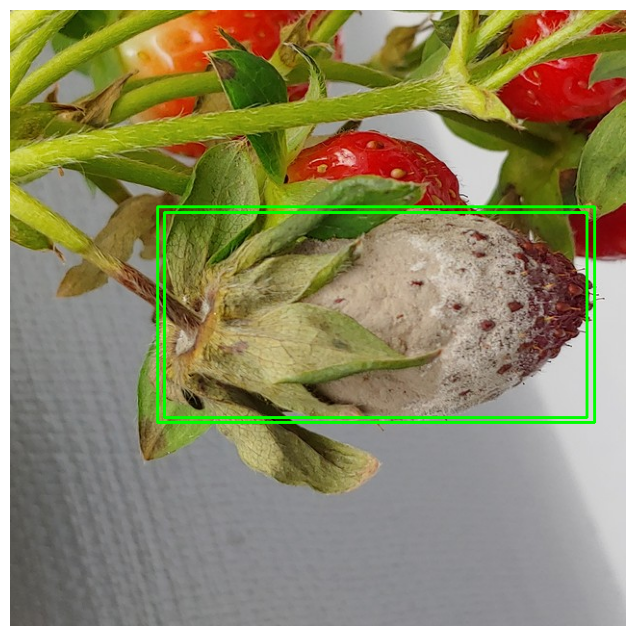

In [8]:
# BBOX 확인
# 이미지 경로
train_image_path = 'Data/Images/Training/TS_딸기_병해충피해이미지/' + image
validation_image_path = 'Data/Images/Validation/VS_딸기_병해충피해이미지/' + image

# 이미지 읽기
image = cv2.imread(train_image_path)
if image is None:
    print("이미지를 찾을 수 없습니다:", train_image_path)
else:
    # BGR → RGB 변환 (Matplotlib는 RGB 형식을 사용)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for bbox in bbox_list:
        x, y, w, h = bbox['x'], bbox['y'], bbox['w'], bbox['h']
        # 사각형 그리기 (RGB 이미지에 그리기)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis('off')  # 축 숨김
    plt.show()

In [15]:
part_name = set()
part_status_pairs = set()

for file_path in training_files:  # training_files는 JSON 파일 경로들의 리스트여야 합니다.
    try:
        with open(file_path, 'r', encoding='utf-8-sig') as f:
            data = json.load(f)

        crop_part = None
        crop_status = None
        for item in data.get('metadata', []):
            if item.get('name') == '작물부위코드':
                crop_part = item.get('value')
            elif item.get('name') == '작물상태코드':
                crop_status = item.get('value')

        if crop_part is not None and crop_status is not None:
            part_status_pairs.add((crop_part, crop_status))
        elif crop_part is not None:
            part_name.add(crop_part)

    except Exception as e:
        print(f"Error reading {file_path}: {e}")

print("고유 작물부위코드와 작물상태코드 쌍 리스트:")
for pair in sorted(part_status_pairs):
    print(pair)

고유 작물부위코드와 작물상태코드 쌍 리스트:
('열매', '잿빛곰팡이병')
('열매', '흰가루병')
('잎', '흰가루병')


### 딸기 해충 트랩

In [2]:
training_file_pattern = 'Data/Json/Training/TL_딸기_해충트랩/*.json'
validation_file_pattern = 'Data/Json/Validation/TL_딸기_해충트랩/*.json'

In [3]:
training_files = glob.glob(training_file_pattern, recursive=True)

validation_files = glob.glob(validation_file_pattern, recursive=True)

In [14]:
try:
    with open(training_files[0], 'r', encoding='utf-8-sig') as f:
        data = json.load(f)
except json.JSONDecodeError as e:
    print(f"JSONDecodeError: {training_files[0]} : {e}")
except Exception as e:
    print(f"Error ({training_files[0]}): {e}")
print(data)

{'description': {'image': 'V003_6_2_1_1_1_1_1_1_0_0_20221108_281_20240422182320.jpg', 'date': '20221108', 'time': '910:30', 'height': 4000, 'width': 2252}, 'metadata': [{'no': 1, 'name': '데이터종류코드', 'value': '해충트랩'}, {'no': 2, 'name': '작물종류코드', 'value': '딸기_설향'}, {'no': 3, 'name': '개체코드', 'value': '구분없음'}, {'no': 4, 'name': '작물부위코드', 'value': '구분없음'}, {'no': 5, 'name': '생육단계코드', 'value': '구분없음'}, {'no': 6, 'name': '작물상태코드', 'value': '구분없음'}, {'no': 7, 'name': '피해정도코드', 'value': '구분없음'}, {'no': 8, 'name': '생육지표코드', 'value': '구분없음'}, {'no': 9, 'name': '', 'value': ''}, {'no': 10, 'name': '', 'value': ''}], 'result': [{'id': '#8df692ce-489d-468b-b2a4-829f064821df', 'type': 'bbox', 'attrb': '객체', 'x': 202, 'y': 263, 'w': 1896, 'h': 3436, 'cx': None, 'cy': None, 'r': None, 'segmentation': []}]}


In [15]:
image = data['description']['image']
print(image)

# 추출할 코드명 리스트
keys_to_extract = ['작물코드', '작물부위코드', '생육단계코드', '작물상태코드']

# 딕셔너리로 결과 저장
extracted = {key: None for key in keys_to_extract}

for item in data['metadata']:
    if item['name'] in keys_to_extract:
        extracted[item['name']] = item['value']

print(extracted)

bbox_list = [item for item in data['result'] if item['type'] == 'bbox']

print(bbox_list)

V003_6_2_1_1_1_1_1_1_0_0_20221108_281_20240422182320.jpg
{'작물코드': None, '작물부위코드': '구분없음', '생육단계코드': '구분없음', '작물상태코드': '구분없음'}
[{'id': '#8df692ce-489d-468b-b2a4-829f064821df', 'type': 'bbox', 'attrb': '객체', 'x': 202, 'y': 263, 'w': 1896, 'h': 3436, 'cx': None, 'cy': None, 'r': None, 'segmentation': []}]


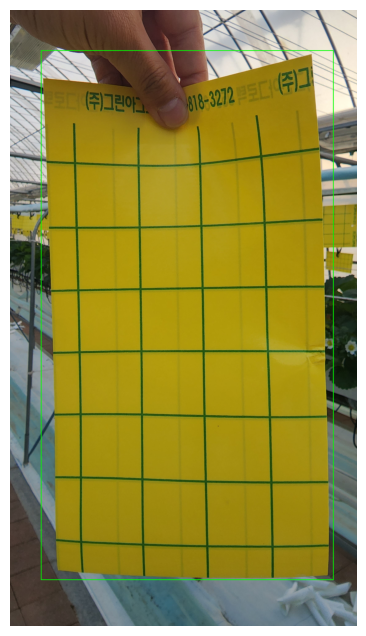

In [16]:
# BBOX 확인
# 이미지 경로
train_image_path = 'Data/Images/Training/TS_딸기_해충트랩/' + image
validation_image_path = 'Data/Images/Validation/VS_딸기_해충트랩' + image

# 이미지 읽기
image = cv2.imread(train_image_path)
if image is None:
    print("이미지를 찾을 수 없습니다:", train_image_path)
else:
    # BGR → RGB 변환 (Matplotlib는 RGB 형식을 사용)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for bbox in bbox_list:
        x, y, w, h = bbox['x'], bbox['y'], bbox['w'], bbox['h']
        # 사각형 그리기 (RGB 이미지에 그리기)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)

    # 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis('off')  # 축 숨김
    plt.show()